# **Gender Classification Model V.1**

## **Import Library**

In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import torch

from keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

## **Load Datasets**

In [40]:
base_dir = 'datasets/'
val_dir = os.path.join(base_dir, 'Validation')
train_dir = os.path.join(base_dir, 'Training')

## **Augmentating Datasets**

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2],  # Variasi pencahayaan
    # width_shift_range=0.2,
    # height_shift_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

## **Making Train And Validation Set**

In [43]:
train_set = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size= 64,
    class_mode='categorical',
)


val_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


## **Initialize Pre-trained Model**

In [44]:
keras_model = MobileNetV2(
    input_shape=(150, 150, 3),
    alpha=1.0,
    weights='imagenet',
    include_top=False
)

keras_model.trainable=False

/tmp/ipykernel_1252/3569152522.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  keras_model = MobileNetV2(


## **Making Model**

In [ ]:
model = Sequential(
    [
        keras_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(2, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │     1,310,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 512)      │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,359,490 (16.63 MB)

 Trainable params: 2,100,482 (8.01 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

## **Compiling Model**

In [47]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

## **Setting Up Checkpoint and EarlyStop**

In [49]:
checkpoint = ModelCheckpoint("Gender.keras",monitor = "val_accuracy",save_best_only = True,verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=10,verbose=1)

## **Training Model**

In [50]:
history = model.fit(
    train_set,
    validation_data = val_set,
    epochs=50,
    callbacks=[checkpoint, earlystop]
)

/home/chocomalt/tfgpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8477 - loss: 0.3576
Epoch 1: val_accuracy improved from -inf to 0.85587, saving model to Gender.keras
735/735 ━━━━━━━━━━━━━━━━━━━━ 149s 188ms/step - accuracy: 0.8477 - loss: 0.3576 - val_accuracy: 0.8559 - val_loss: 0.3678
Epoch 2/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9028 - loss: 0.2432
Epoch 2: val_accuracy did not improve from 0.85587
735/735 ━━━━━━━━━━━━━━━━━━━━ 122s 165ms/step - accuracy: 0.9028 - loss: 0.2432 - val_accuracy: 0.8483 - val_loss: 0.3267
Epoch 3/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9136 - loss: 0.2223
Epoch 3: val_accuracy improved from 0.85587 to 0.90918, saving model to Gender.keras
735/735 ━━━━━━━━━━━━━━━━━━━━ 122s 165ms/step - accuracy: 0.9136 - loss: 0.2223 - val_accuracy: 0.9092 - val_loss: 0.2324
Epoch 4/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9139 - loss: 0.2176
Epoch 4: val_accuracy did not improve from 0.90918
735/735 ━━━━━━━━

## **Evaluating Model**

In [51]:
loss, acc = model.evaluate(val_set)
print("Accuracy: {:.2f}".format(acc))
print("Loss: {:.2f}".format(loss))

183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9283 - loss: 0.1924
Accuracy: 0.93
Loss: 0.18


## **Visualizing Loss And Accuracy**

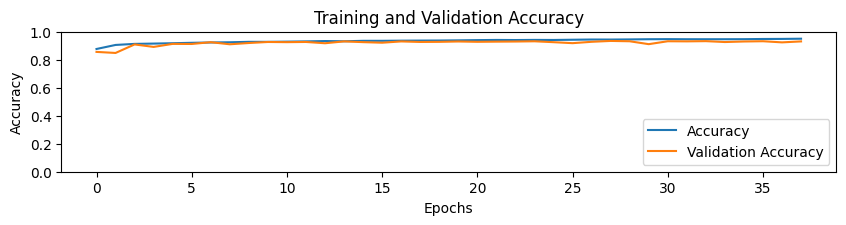

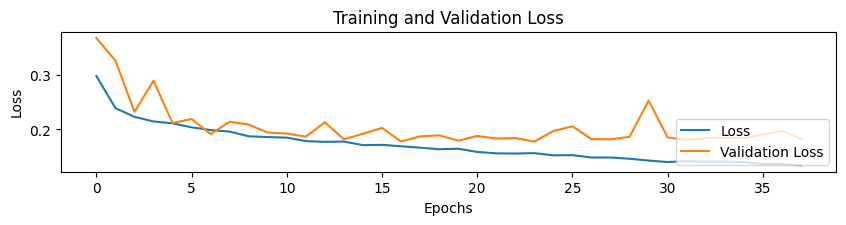

In [52]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10,4))
ax = plt.subplot(2, 1, 1)
ax.plot(accuracy, label="Accuracy")
ax.plot(val_accuracy, label="Validation Accuracy")
ax.legend(loc="lower right")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Training and Validation Accuracy")
ax.set_ylim([0,1])

plt.show()

plt.figure(figsize=(22,4))
ax = plt.subplot(2, 2, 1)
ax.plot(loss, label="Loss")
ax.plot(val_loss, label="Validation Loss")
ax.legend(loc="lower right")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Training and Validation Loss")
plt.show()

## **Checking Model**

In [6]:
import matplotlib.pyplot as plt

In [7]:
import cv2
from tensorflow.keras.models import load_model

In [10]:
male = 0
female = 0
def checking(img):
    label = {0:"female",1:"male"} 
    model = load_model("saved_model/gender_classifier_final.h5")
    image =cv2.imread(img)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("datasets/Input/haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(gray,1.1,7)#1.1
    global male
    global female
    
    for x,y,w,h in faces:
        face = image[y:y+h,x:x+w]
        face = cv2.resize(face,(256,256))
        img_scaled = face/255.0
        reshape = np.reshape(img_scaled,(1,256,256,3))
        img = np.vstack([reshape])
        result = model.predict(img)
        
        predicted_class = np.argmax(result, axis=1)[0]
        if predicted_class == 0:
            cv2.rectangle(image,(x-10,y),(x+w,y+h),(0,255,0),4)
            cv2.rectangle(image,(x-10,y-50),(x+w,y),(255,0,0),-1)
            cv2.putText(image,label[0],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
            female = female + 1
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            plt.imshow(image)                
                
        elif predicted_class == 1:
            cv2.rectangle(image,(x-10,y),(x+w,y+h),(0,255,0),4)
            cv2.rectangle(image,(x-10,y-50),(x+w,y),(255,0,0),-1)
            cv2.putText(image,label[1],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
            male = male + 1
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            plt.imshow(image)            
    print(f"female: {female}")
    print(f"male: {male}")
    plt.show()
    cv2.destroyAllWindows()

I0000 00:00:1733538531.059889   10386 service.cc:148] XLA service 0x7fc660002280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733538531.060656   10386 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-07 09:28:51.097118: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733538531.353594   10386 cuda_dnn.cc:529] Loaded cuDNN version 90501
E0000 00:00:1733538531.996393   10386 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733538532.113353   10386 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733538532.207

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
female: 1
male: 0


I0000 00:00:1733538534.639198   10386 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


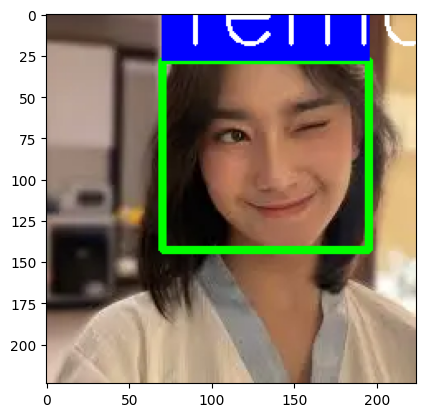

In [11]:
checking('datasets/Input/images.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
female: 1
male: 1


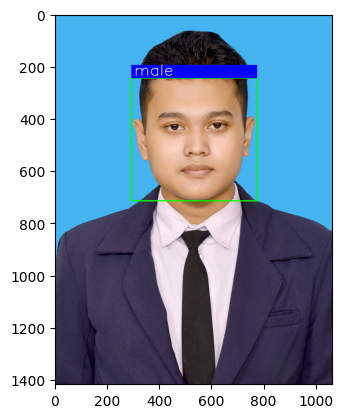

In [12]:
checking('datasets/Input/Pas Foto.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
female: 6
male: 6


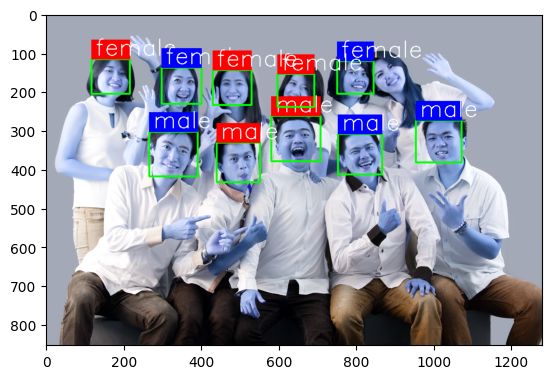

In [13]:
checking("datasets/Input/group1.jpg")

In [ ]:
model.save("saved_model/gender_classifier_final.h5", )

## **Trying Real-Time Detection**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("saved_model/gender.h5")
input_size = (128, 128)
face_cascade = cv2.CascadeClassifier("datasets/Input/haarcascade_frontalface_default.xml")

def preprocess_image(face):
    resized_face = cv2.resize(face, input_size)
    normalized_face = resized_face / 255.0
    input_face = np.expand_dims(normalized_face, axis=0)
    return input_face

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Tidak dapat mengakses kamera.")
    exit()

print("Tekan 'q' untuk keluar.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Tidak dapat membaca frame dari kamera.")
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=7)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]

        input_face = preprocess_image(face)
        prediction = model.predict(input_face)

        predicted_class = np.argmax(prediction, axis=1)[0]
        confidence = np.max(prediction)

        label = f"Class: {'Male' if predicted_class == 1 else 'Female'}, Confidence: {confidence:.2f}"
        
        color = (0, 255, 0) if predicted_class == 0 else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    cv2.imshow("Live Camera Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## **Converting .h5 Model to .tflite**

In [34]:
import tensorflow as tf

# Load model TensorFlow
model = tf.keras.models.load_model("saved_model/gender_classifier_final.h5")

# Konversi ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Simpan model dalam format .tflite
with open("gender_classifier_final2.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TensorFlow Lite.")


INFO:tensorflow:Assets written to: /tmp/tmpieyxtovr/assets


INFO:tensorflow:Assets written to: /tmp/tmpieyxtovr/assets


Saved artifact at '/tmp/tmpieyxtovr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  139638227011728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227017680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227017296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227018064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227018448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227015568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227020560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227020176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227020368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139638227017488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396382270197

W0000 00:00:1733207963.072423    1295 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1733207963.072763    1295 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-03 13:39:23.073992: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpieyxtovr
2024-12-03 13:39:23.083280: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-03 13:39:23.083328: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpieyxtovr
2024-12-03 13:39:23.184652: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-03 13:39:23.989651: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpieyxtovr
2024-12-03 13:39:24.112406: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 1038424 microseconds.


Model berhasil dikonversi ke TensorFlow Lite.
